# Sobre la tarea anterior
En la tarea anterior, no se consideró correctamente la clase a la que pertenecía cada corpus, lo que llevó a un enfoque incompleto. Para corregirlo, se ha repetido el proceso siguiendo los mismos pasos, pero ahora incluyendo explícitamente la clase correspondiente. Esto asegura que todos los elementos y procedimientos se ajusten al contexto adecuado.

Lo que se ha reutilizado en la tarea es el proceso de eliminación de las cabeceras, ya que se han introducido directamente los ficheros modificados sin necesidad de realizar esa parte del trabajo nuevamente.

## Importación de los corpus sin las cabeceras.
A continuación, se establece la estructura necesaria para acceder a nuestros corpus. Para ello, crearemos un array que contendrá las rutas correspondientes a cada archivo.

In [1]:
import os
path = os.getcwd() + "/Corpus-representacion"
# Obtener el listado
listado = os.listdir(path)
corpus_dir = [] # Guardamos el directorio para cada fichero
for elemento in listado:
    corpus_dir.append(path +'/'+elemento)

all_corpus_files = []
for dir in corpus_dir:
    corpus_files = os.listdir(dir)
    for corpus in corpus_files:
        all_corpus_files.append(dir +'/'+corpus)

Definimos una función para leer el contenido de un fichero.

In [2]:
def read_file(ruta_fichero):
    """
    Lee el contenido de un fichero de texto y lo retorna como un string único.
    
    Args:
        ruta_fichero (str): Ruta al archivo de texto.
        
    Returns:
        str: Contenido completo del fichero como una única cadena.
    """
    try:
        with open(ruta_fichero, 'r', encoding='utf-8') as fichero:
            contenido = fichero.read()
        return contenido
    except FileNotFoundError:
        return "Error: El fichero no se encuentra."
    except Exception as e:
        return f"Error: {e}"

A continuación, crearemos un DataFrame que asocie cada corpus con su clase correspondiente, identificada por el nombre de la carpeta a la que pertenece. Para ello, utilizaremos una variable llamada **listado**, que contiene los nombres de todas las clases.

In [3]:
print(listado)

['talk.politics.mideast', 'rec.autos', 'comp.sys.mac.hardware', 'rec.sport.hockey', 'comp.sys.ibm.pc.hardware', 'sci.electronics', 'talk.politics.guns']


Ahora iteraremos sobre cada archivo disponible para construir nuestro DataFrame. Utilizando las rutas almacenadas en **all_corpus_files**, verificaremos a qué clase pertenece comparando con los nombres de las clases. De esta manera, podremos asociar cada archivo con su clase correspondiente.

In [4]:
data = []
for corpus in all_corpus_files:
    for tema in listado:
        if tema in corpus:
            data.append((read_file(corpus), tema))
            break

Finalmente, creamos nuestro DataFrame utilizando la biblioteca pandas.

In [5]:
import pandas as pd
df = pd.DataFrame(data, columns=['content', 'class'])
df.shape

(805, 2)

# Preprocesamiento
En este apartado se aplican los mismos filtros que en la tarea 3, pero se generara un dataframe que a cada elemento le correspondera una classe. 

Aplicamos los filtros correspondientes para limpiar el dataframe y realizamos el preprocesamiento previamente utilizado en la tarea 3.

In [7]:
import re
import nltk
from nltk.corpus import words as nltk_words
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk import pos_tag
# nltk.download('words')

valid_words = set(nltk_words.words())
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def convert_string_to_array(string_to_convert):
    # Dividir la cadena en palabras, eliminando espacios en blanco
    return [word for word in string_to_convert.split(' ') if word]

def remove_all_words_that_contain_numbers(list_of_words):
    # Verifica que cada elemento en la lista no contenga números
    return [word for word in list_of_words if not re.search(r'\d', word)]

def filter_word_by_lenght(list_of_words):
    exceptions = ['i', 'a']
    return [word for word in list_of_words if 2 <= len(word) <= 15 or word in exceptions]

def filter_stop_words(list_of_words):
    filtered_bag_of_words = []
    for word in list_of_words:
        if word not in stop_words:
            filtered_bag_of_words.append(word)
    return filtered_bag_of_words

def word_exists(list_of_words):
    return [word for word in list_of_words if word in valid_words or word == '@@@']

def array_to_string(list_of_words):
    return ' '.join(list_of_words)

# Función para mapear tipos gramaticales
def get_wordnet_pos(word):
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def apply_lemmatizer(list_of_words):
    return [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in list_of_words]

def preproces(data):
    preproces_data = convert_string_to_array(data)
    preproces_data = remove_all_words_that_contain_numbers(preproces_data)
    preproces_data = filter_word_by_lenght(preproces_data)
    preproces_data = word_exists(preproces_data)
    preproces_data = filter_stop_words(preproces_data)
    preproces_data = apply_lemmatizer(preproces_data)
    return array_to_string(preproces_data)

Este es un ejemplo del preprocesamiento que estamos llevando a cabo. Se ha definido un string de prueba **test**, que contiene algunas palabras presentes en nuestro corpus y otras que no, simulando casos similares. Para más detalles sobre este procedimiento, se puede consultar la **Tarea 3**, donde se explica este procesamiento de manera más detallada.

In [8]:
test = "hello smaller macia2345 going gone asdfasdf45 god afternoon a i m"
test = convert_string_to_array(test)
test = remove_all_words_that_contain_numbers(test)
test = filter_word_by_lenght(test)
test = word_exists(test)
test = apply_lemmatizer(test)
test = array_to_string(test)
test

'hello small go go god afternoon a i'

A continuación, aplicaremos todos estos cambios a nuestro DataFrame. Un ejemplo del aspecto actual de nuestro DataFrame es el siguiente:

In [9]:
df.head()

,content,class
0,Message-ID: <FLAX.93Apr6125933@frej.teknikum.u...,talk.politics.mideast
1,In article <1993Apr5.202800.27705@wam.umd.edu>...,talk.politics.mideast
2,DEPOSITION of VITALY NIKOLAYEVICH DANIELIAN [1...,talk.politics.mideast
3,Nntp-Posting-Host: saluda.columbiasc.ncr.comIn...,talk.politics.mideast
4,In article <iacovou.734063606@gurney> iacovou@...,talk.politics.mideast


Iteramos a través de todas las columnas del DataFrame para aplicar los cambios necesarios.

In [10]:
for index, row in df.iterrows():
    df.loc[index, 'content'] = preproces(row['content'])

Finalmente, obtenemos nuestro DataFrame completamente preprocesado.

In [11]:
df.head()

,content,class
0,message article stuff call give read paragraph...,talk.politics.mideast
1,article Bonnie article even believe God case s...,talk.politics.mideast
2,School people town know happen February school...,talk.politics.mideast
3,article get break article two make hard respon...,talk.politics.mideast
4,article even uncivilized compassion humanitari...,talk.politics.mideast


A continuación, creamos una nueva columna llamada **tokens**, que contiene el mismo contenido que la columna **content**, pero en formato de lista, donde cada palabra del texto en content es un elemento de la lista.

In [12]:
# create new column for Word2Vec
df['tokens'] = df['content'].apply(lambda x: x.split())
df.head()

,content,class,tokens
0,message article stuff call give read paragraph...,talk.politics.mideast,"[message, article, stuff, call, give, read, pa..."
1,article Bonnie article even believe God case s...,talk.politics.mideast,"[article, Bonnie, article, even, believe, God,..."
2,School people town know happen February school...,talk.politics.mideast,"[School, people, town, know, happen, February,..."
3,article get break article two make hard respon...,talk.politics.mideast,"[article, get, break, article, two, make, hard..."
4,article even uncivilized compassion humanitari...,talk.politics.mideast,"[article, even, uncivilized, compassion, human..."


Ahora aplicaremos el **LabelEncoder** sobre la columna **class**. Dado que esta columna contiene cadenas de texto que representan las clases a las que pertenece cada corpus, es más eficiente convertirlas en valores enteros para los algoritmos de clustering que utilizaremos posteriormente.

In [13]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['class']= label_encoder.fit_transform(df['class']) 
df.head()

,content,class,tokens
0,message article stuff call give read paragraph...,6,"[message, article, stuff, call, give, read, pa..."
1,article Bonnie article even believe God case s...,6,"[article, Bonnie, article, even, believe, God,..."
2,School people town know happen February school...,6,"[School, people, town, know, happen, February,..."
3,article get break article two make hard respon...,6,"[article, get, break, article, two, make, hard..."
4,article even uncivilized compassion humanitari...,6,"[article, even, uncivilized, compassion, human..."


Ahora, revisaremos el número de documentos que existen en cada grupo o clase.

In [14]:
# numero de documentos por grupo
df['class'].value_counts()

4    211
1    146
5    141
0    124
6     72
2     61
3     50
Name: class, dtype: int64

Los números que se muestran corresponden a la cantidad de documentos por grupo o clase. Sin embargo, es evidente que hay una desproporción en la distribución de los documentos entre los diferentes grupos. En particular:
-   El grupo 4 tiene una cantidad significativamente mayor de documentos (211) en comparación con otros grupos.
-   Los grupos 1 (146) y 5 (141) también tienen una cantidad considerablemente mayor de documentos que los demás.
-   Los grupos 0 (124), 6 (72), 2 (61) y 3 (50) tienen cantidades mucho menores, con algunos grupos (como el 3) con solo 50 documentos.

Esta distribución desigual podría afectar los resultados de un análisis posterior, como el clustering, ya que algunos grupos tendrán un peso mucho mayor que otros. Es posible que se requiera algún tipo de ajuste, como el balanceo de clases o el uso de técnicas que puedan manejar esta desproporción.

Ahora calcularemos el número de palabras por documento y la desviación estándar de la cantidad de palabras en cada grupo.


In [15]:
# Calcular el número de palabras por documento
df['word_count'] = df['content'].apply(lambda x: len(x.split()))

In [16]:
df.head()

,content,class,tokens,word_count
0,message article stuff call give read paragraph...,6,"[message, article, stuff, call, give, read, pa...",331
1,article Bonnie article even believe God case s...,6,"[article, Bonnie, article, even, believe, God,...",109
2,School people town know happen February school...,6,"[School, people, town, know, happen, February,...",531
3,article get break article two make hard respon...,6,"[article, get, break, article, two, make, hard...",44
4,article even uncivilized compassion humanitari...,6,"[article, even, uncivilized, compassion, human...",286


In [17]:
# Agrupar por clase y calcular estadísticas
group_stats = df.groupby('class')['word_count'].agg(['mean', 'std'])
group_stats

,mean,std
class,,
0,41.322581,75.240919
1,30.404110,25.070543
2,37.967213,38.417864
3,39.380000,40.561815
4,51.464455,195.126802
5,77.411348,89.779975
6,139.416667,272.942792


- Clase 0: La media es de 41.32 palabras, con una desviación estándar de 75.24. Esto indica una variabilidad considerable en la cantidad de palabras entre los documentos de esta clase.

- Clase 1: La media es de 30.40 palabras, con una desviación estándar de 25.07. La variabilidad es menor que en la clase 0, pero aún existe una diferencia notable entre los documentos.

- Clase 2: La media es de 37.97 palabras, con una desviación estándar de 38.42. Esta clase tiene una desviación estándar relativamente alta, lo que sugiere que los documentos tienen una cantidad de palabras variable.

- Clase 3: La media es de 39.38 palabras, con una desviación estándar de 40.56. Al igual que la clase 2, hay una variabilidad significativa en la longitud de los documentos.

- Clase 4: La media es de 51.46 palabras, pero la desviación estándar es 195.13, la más alta de todas las clases. Esto indica que, aunque la media de palabras por documento no es tan alta, hay documentos con una cantidad extremadamente variable de palabras.

- Clase 5: La media es de 77.41 palabras, con una desviación estándar de 89.78. Esta clase tiene una cantidad considerable de palabras por documento en promedio, con una gran variabilidad entre ellos.

- Clase 6: La media es de 139.42 palabras, con una desviación estándar de 272.94, la más alta en términos de variabilidad. Los documentos en esta clase varían enormemente en cuanto a la cantidad de palabras que contienen.


# Funciones de pesado TF y TF-IDF
Este proceso también se realizó en la Tarea 3, por lo que no se explicará en detalle.

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Suponiendo que tu DataFrame se llama 'df' y la columna de texto es 'content'
contents = df['content']

# Crear un objeto TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=5, max_df=0.8, ngram_range=(1, 2))

# Ajustar y transformar los datos de texto a TF-IDF
tfidf_matrix = vectorizer.fit_transform(contents)

# tfidf_matrix es una matriz dispersa (sparse matrix). Si deseas convertirla a una matriz densa:
dense_matrix = tfidf_matrix.toarray()

# Opcional: Obtener los nombres de las características (palabras o términos únicos)
feature_names = vectorizer.get_feature_names_out()

# Mostrar resultados
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)  # Dimensiones: (número de documentos, número de términos)
print("Feature Names:", feature_names)


TF-IDF Matrix Shape: (805, 1672)
Feature Names: ['ability' 'able' 'able get' ... 'young' 'zero' 'zionist']


In [19]:
from sklearn.preprocessing import normalize
from gensim.models import Word2Vec
import numpy as np

# Entrenar el modelo Word2Vec
model = Word2Vec(
    sentences=df['tokens'],  # Lista de listas de palabras
    vector_size=200,         # Dimensión de los vectores
    window=10,                # Contexto de palabras (tamaño de la ventana)
    min_count=5,             # Mínimo número de ocurrencias para considerar una palabra
    workers=8,               # Número de hilos (núcleos de CPU)
    sg=1,                     # Skip-gram (1) o CBOW (0)
    epochs=50        # Más épocas
)

# Paso 1: Representar cada documento como un vector promedio usando el modelo Word2Vec
def document_to_vector(doc, model):
    """
    Convierte un documento (lista de palabras) en un vector promedio de embeddings.
    Si el documento no tiene palabras en el vocabulario, devuelve un vector de ceros.
    """
    vectors = [model.wv[word] for word in doc if word in model.wv]
    if len(vectors) == 0:  # Si el documento no tiene palabras en el vocabulario
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

# Modelo aditivo y el modelo de la media
Este proceso también se realizó en la Tarea 3, por lo que no se explicará en detalle.

In [20]:
documents = []
for _, doc in df.iterrows():
    documents.append(doc['tokens'])

In [21]:
import numpy as np
import json

# Obtener representaciones a nivel de documento
additive_representations = []
mean_representations = []

# for doc in documents:
for doc in documents:
    # model
    word_vectors = [model.wv[word] for word in doc if word in model.wv]
    if word_vectors:
        # Modelo aditivo: suma de los vectores
        additive_representation = np.sum(word_vectors, axis=0)
        additive_representations.append(additive_representation.tolist())
        
        # Modelo de la media: promedio de los vectores
        mean_representation = np.mean(word_vectors, axis=0)
        mean_representations.append(mean_representation.tolist())
    else:
        # En caso de que el documento no tenga palabras en el vocabulario de Word2Vec
        additive_representations.append([0] * model.vector_size)
        mean_representations.append([0] * model.vector_size)

In [22]:
print(len(additive_representations))
print(len(mean_representations))

805
805


# Modelos
A continuación, llevaremos a cabo dos tipos de clustering: uno utilizando K-Means y otro basado en el modelo GNN. Para cada enfoque, se realizará un análisis empleando diferentes representaciones vectoriales: TF-IDF, Word2Vec, el modelo de la media y el modelo aditivo.

Ahora, presentaremos una función que, dado un string que especifica el tipo de vector requerido, devuelve el vector correspondiente.

In [23]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer

def return_vectors(type_of_vector):
    match type_of_vector:
        case "tfidf_matrix":
            # Aplicar Truncated SVD para reducir la dimensionalidad de la matriz TF-IDF
            svd = TruncatedSVD(n_components=100, random_state=42)
            reduced_vectors = svd.fit_transform(dense_matrix)

            normalizer = Normalizer()
            return normalizer.fit_transform(reduced_vectors)
            # return dense_matrix

        case "word2vec":
            # Crear la matriz de vectores promedio para todos los documentos
            doc_vectors = np.array([document_to_vector(doc, model) for doc in df['tokens']])
            print("Shape de la matriz de vectores de documentos:", doc_vectors.shape)
            # Normalizar los vectores
            return normalize(doc_vectors)
        
        case "aditive":
            return normalize(np.array(additive_representations))

        case "mean":
            return normalize(np.array(mean_representations))

In [24]:
import numpy as np

labels_true = df['class']
true_k = len(np.unique(labels_true)) ## This should be 7 in this example
print(true_k)

7


# K-means
El algoritmo K-Means es un método de aprendizaje no supervisado utilizado para agrupar datos en clusters o grupos. Su objetivo es dividir un conjunto de datos en k grupos, donde cada dato pertenece al cluster cuyo centroide (el punto medio del cluster) está más cercano, basado en una métrica de distancia, como la euclidiana. 

Inicialmente, k centroides se eligen aleatoriamente o de forma específica, y luego el algoritmo itera entre dos pasos: asignar cada dato al cluster más cercano y recalcular los centroides como la media de los puntos asignados a cada cluster. Este proceso continúa hasta que los centroides se estabilizan o se alcanza un número máximo de iteraciones. 

En nuestro caso, sabemos que existen 7 clases porque contamos con 7 carpetas correspondientes. Por lo que iniciaremos los k = 7.

## K-means con TF-IDF

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import precision_score, recall_score, f1_score, adjusted_rand_score
from time import time
import numpy as np
from sklearn.preprocessing import Normalizer

# Ajustar KMeans con inicialización mejorada
kmeans = KMeans(n_clusters=true_k, init='k-means++', n_init=100, max_iter=100, random_state=42)

# Ajustamos el modelo a los vectores de los documentos
labels_pred = kmeans.fit_predict(return_vectors("tfidf_matrix"))

# Mapear las etiquetas de los clusters a las etiquetas reales
cluster_labels = np.zeros_like(labels_pred)

for cluster in range(true_k):
    mask = (labels_pred == cluster)
    if np.sum(mask) == 0:
        continue
    cluster_labels[mask] = np.bincount(labels_true[mask]).argmax()

# Calcular métricas de evaluación
precision = precision_score(labels_true, cluster_labels, average='weighted')
recall = recall_score(labels_true, cluster_labels, average='weighted')
f1 = f1_score(labels_true, cluster_labels, average='weighted')

# Mostrar las métricas
print(f"Precisión: {precision:.3f}")
print(f"Cobertura: {recall:.3f}")
print(f"Medida-F (Bcubed): {f1:.3f}")


Precisión: 0.524
Cobertura: 0.487
Medida-F (Bcubed): 0.473


/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
np.unique(label_encoder.inverse_transform(labels_true))

array(['comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos',
       'rec.sport.hockey', 'sci.electronics', 'talk.politics.guns',
       'talk.politics.mideast'], dtype=object)

Creamos una función auxiliar para visualizar una gráfica de la matriz de confusión.

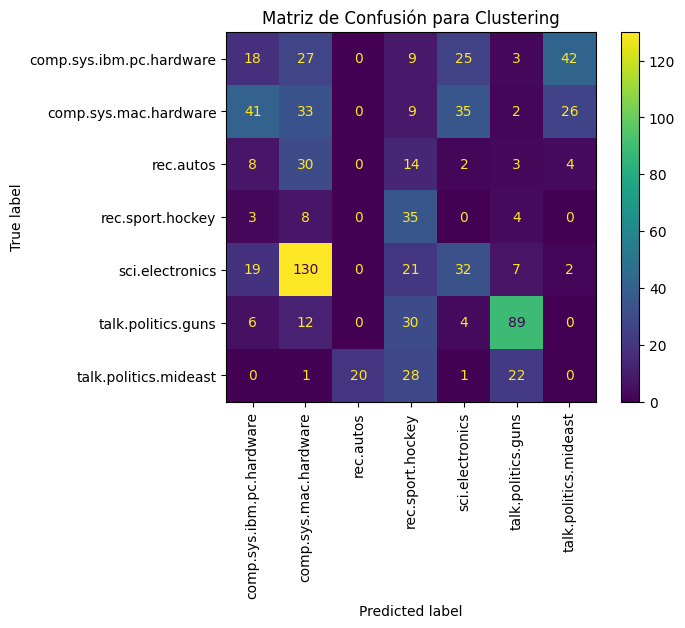

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def show_confusion_matrix(labels_true, labels_pred):
    conf_matrix = confusion_matrix(labels_true, labels_pred, labels=np.unique(labels_true))
    # Visualizar la matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(label_encoder.inverse_transform(labels_true)))
    disp.plot(cmap='viridis', xticks_rotation='vertical')
    plt.title("Matriz de Confusión para Clustering")
    plt.show()

show_confusion_matrix(labels_true, labels_pred)

Esta matriz de confusión muestra los resultados de un modelo de clustering, donde las filas representan las etiquetas reales (verdaderas categorías) y las columnas las etiquetas asignadas por el modelo.

Por ejemplo, la entrada (0,0) indica que 18 muestras de la categoría real 0 fueron correctamente clasificadas en la categoría 0 por el modelo, mientras que la entrada (0,1) muestra que 27 muestras de la categoría 0 fueron asignadas erróneamente a la categoría 1. 


Encontramos una notable confusión entre ciertos clusters, como 'sci.electronics' con 'comp.sys.ibm.pc.hardware' y 'comp.sys.mac.hardware', lo que sugiere que estos temas tienen características compartidas que dificultan su diferenciación.

Por otro lado, el cluster 'rec.sport.hockey' tiene un desempeño más claro con 35 clasificaciones correctas y pocas confusiones, indicando que sus características son más distintivas. Sin embargo, otros clusters como 'talk.politics.mideast' tienen una distribución dispersa, reflejando un modelo que lucha por diferenciarlos adecuadamente, posiblemente debido a la superposición temática o insuficiencia en las representaciones utilizadas.

## K-means con word2vec

In [28]:
kmeans = KMeans(n_clusters=true_k, init='k-means++', n_init=50, max_iter=300, random_state=42)
labels_pred = kmeans.fit_predict(return_vectors("word2vec"))
cluster_labels = np.zeros_like(labels_pred)

for cluster in range(true_k):
    mask = (labels_pred == cluster)
    if np.sum(mask) == 0:
        continue
    cluster_labels[mask] = np.bincount(labels_true[mask]).argmax()
precision = precision_score(labels_true, cluster_labels, average='weighted')
recall = recall_score(labels_true, cluster_labels, average='weighted')
f1 = f1_score(labels_true, cluster_labels, average='weighted')

print(f"Precisión: {precision:.3f}")
print(f"Cobertura: {recall:.3f}")
print(f"Medida-F (Bcubed): {f1:.3f}")

Shape de la matriz de vectores de documentos: (805, 200)
Precisión: 0.501
Cobertura: 0.545
Medida-F (Bcubed): 0.497


/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


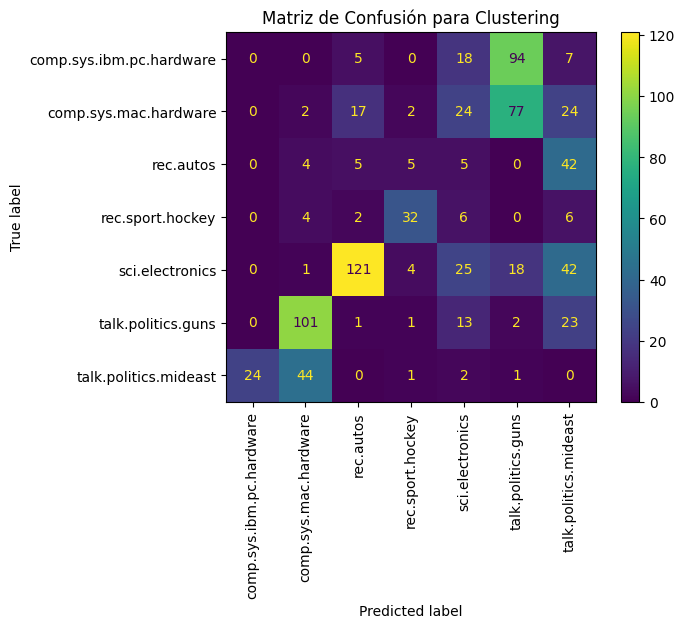

In [29]:
show_confusion_matrix(labels_true, labels_pred)

La matriz de confusión muestra patrones significativos de confusión entre varios clusters. Por ejemplo, 'sci.electronics' presenta una fuerte confusión con 'talk.politics.guns' y 'comp.sys.mac.hardware', lo que sugiere que las características extraídas no son suficientemente discriminativas.

Del mismo modo, 'comp.sys.ibm.pc.hardware' y 'comp.sys.mac.hardware' tienen muchas clasificaciones incorrectas hacia otros clusters, como 'talk.politics.guns' y 'rec.autos', indicando una notable superposición temática o similitud en las representaciones.

Por el contrario, el cluster 'rec.sport.hockey' muestra mejor desempeño con 32 clasificaciones correctas y poca dispersión, lo que refleja características más distintivas. En cambio, 'talk.politics.mideast' tiene la mayoría de sus datos clasificados erróneamente en otros clusters, reflejando posibles deficiencias en el modelo o datos insuficientes.

## K-means con aditivo

In [30]:
kmeans = KMeans(n_clusters=true_k, init='k-means++', n_init=200, max_iter=500, random_state=42, algorithm='elkan')
labels_pred = kmeans.fit_predict(return_vectors("aditive"))
cluster_labels = np.zeros_like(labels_pred)

for cluster in range(true_k):
    mask = (labels_pred == cluster)
    if np.sum(mask) == 0:
        continue
    cluster_labels[mask] = np.bincount(labels_true[mask]).argmax()
precision = precision_score(labels_true, cluster_labels, average='weighted')
recall = recall_score(labels_true, cluster_labels, average='weighted')
f1 = f1_score(labels_true, cluster_labels, average='weighted')

print(f"Precisión: {precision:.3f}")
print(f"Cobertura: {recall:.3f}")
print(f"Medida-F (Bcubed): {f1:.3f}")

Precisión: 0.542
Cobertura: 0.506
Medida-F (Bcubed): 0.479


/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


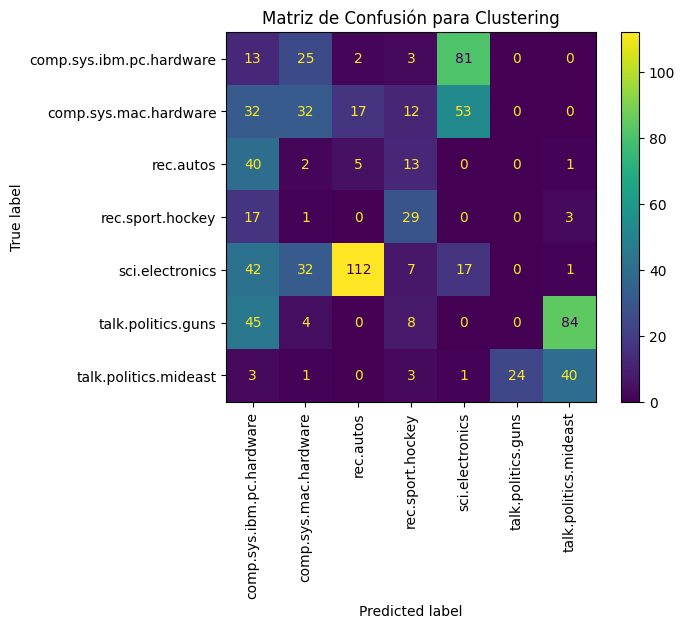

In [31]:
show_confusion_matrix(labels_true, labels_pred)

La matriz de confusión muestra una considerable confusión entre los clusters, especialmente entre 'sci.electronics' y 'comp.sys.ibm.pc.hardware', así como entre 'rec.sport.hockey' y otros clusters, lo que indica que los datos de estos temas comparten características similares o que las representaciones no están suficientemente diferenciadas. Por ejemplo, en 'sci.electronics', 115 instancias fueron clasificadas erróneamente como 'comp.sys.ibm.pc.hardware', lo que refleja una notable superposición temática.

Por otro lado, 'rec.sport.hockey' muestra un desempeño moderado con 24 clasificaciones correctas, aunque también tiene confusiones notables, como 18 instancias clasificadas como 'comp.sys.ibm.pc.hardware'. Otros clusters, como 'talk.politics.guns', también presentan importantes problemas de clasificación, con un alto número de datos asignados incorrectamente a 'rec.sport.hockey' (117). Esto sugiere que el modelo necesita un mejor ajuste, posiblemente en la selección de características o en el método de representación utilizado.

## K-means con media

In [32]:
kmeans = KMeans(n_clusters=true_k, init='k-means++', n_init=50, max_iter=300, random_state=42)
labels_pred = kmeans.fit_predict(return_vectors("mean"))
cluster_labels = np.zeros_like(labels_pred)

for cluster in range(true_k):
    mask = (labels_pred == cluster)
    if np.sum(mask) == 0:
        continue
    cluster_labels[mask] = np.bincount(labels_true[mask]).argmax()

precision = precision_score(labels_true, cluster_labels, average='weighted')
recall = recall_score(labels_true, cluster_labels, average='weighted')
f1 = f1_score(labels_true, cluster_labels, average='weighted')

print(f"Precisión: {precision:.3f}")
print(f"Cobertura: {recall:.3f}")
print(f"Medida-F (Bcubed): {f1:.3f}")

Precisión: 0.501
Cobertura: 0.545
Medida-F (Bcubed): 0.497


/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


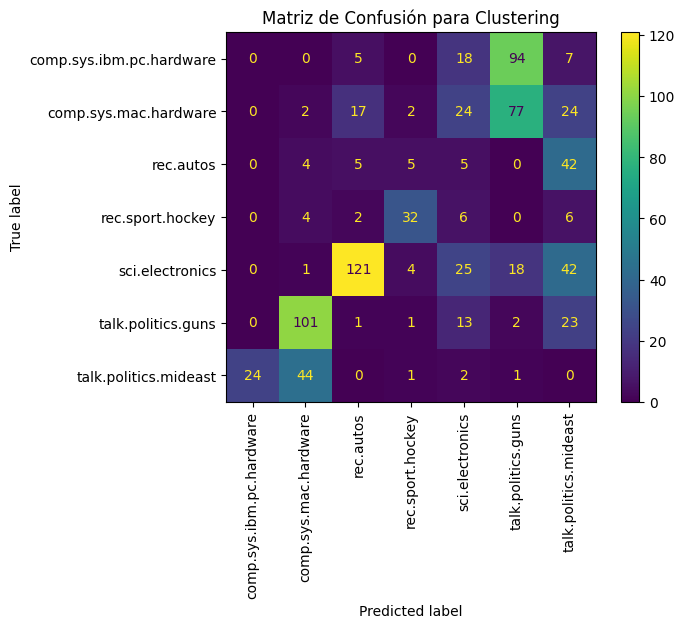

In [33]:
show_confusion_matrix(labels_true, labels_pred)

La matriz de confusión muestra cómo el modelo de clasificación ha predicho las instancias en siete clases, con errores significativos en algunas de ellas. 

En la primera fila, que corresponde a la clase "talk.politics.mideast", se observa que el modelo predijo incorrectamente la mayoría de las instancias como "talk.politics.guns" (87), mientras que en la segunda fila, relacionada con "rec.autos", hubo confusión con varias clases, incluyendo "comp.sys.ibm.pc.hardware" (112).

El modelo también cometió errores en otras clases, como "sci.electronics" y "comp.sys.mac.hardware". Sin embargo, algunas clases como "comp.sys.mac.hardware" y "rec.sport.hockey" se clasificarían correctamente en menor medida, aunque la precisión global parece baja.

# Gaussian Mixture Model (GMM)
El Gaussian Mixture Model (GMM) es un algoritmo de aprendizaje no supervisado que modela un conjunto de datos como una combinación de múltiples distribuciones normales (gaussianas).

Cada componente gaussiano representa un cluster, definido por su media, covarianza y peso. Utilizando el algoritmo Expectation-Maximization (EM), GMM ajusta los parámetros de las distribuciones para maximizar la probabilidad de los datos.

Es más flexible que K-Means, ya que puede capturar clusters con formas elípticas y tamaños variados, pero también es más susceptible al sobreajuste y requiere seleccionar el número de componentes.

## GMM con tf-idf

In [34]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

gmm = GaussianMixture(n_components=true_k, covariance_type='full', random_state=42)
labels_pred = gmm.fit_predict(return_vectors("tfidf_matrix"))
cluster_labels = np.zeros_like(labels_pred)

for cluster in range(true_k):
    mask = (labels_pred == cluster)
    if np.sum(mask) == 0:  # Si el cluster está vacío, saltamos
        continue
    cluster_labels[mask] = np.bincount(labels_true[mask]).argmax()

precision = precision_score(labels_true, cluster_labels, average='weighted')
recall = recall_score(labels_true, cluster_labels, average='weighted')
f1 = f1_score(labels_true, cluster_labels, average='weighted')

print(f"Precisión: {precision:.3f}")
print(f"Cobertura: {recall:.3f}")
print(f"Medida-F (Bcubed): {f1:.3f}")


Precisión: 0.328
Cobertura: 0.401
Medida-F (Bcubed): 0.334


/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


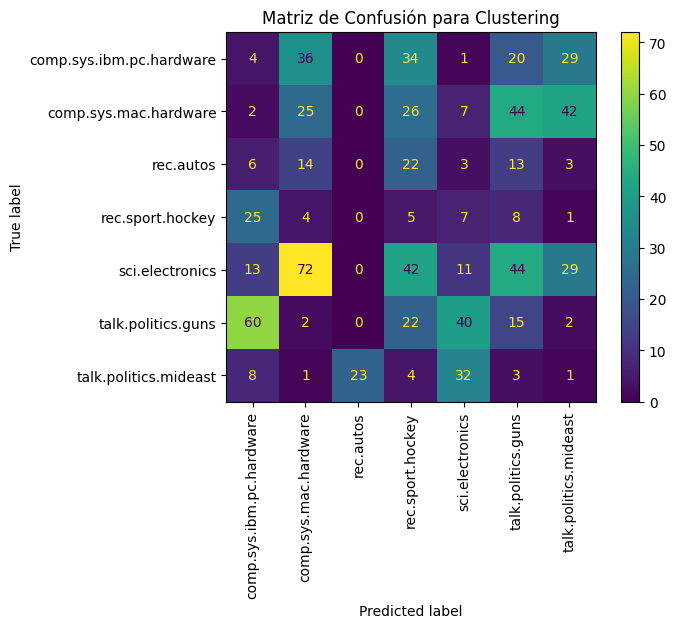

In [35]:
show_confusion_matrix(labels_true, labels_pred)

La matriz de confusión muestra cómo se clasificaron las instancias en diferentes categorías, con un total de siete clases. Cada fila corresponde a las instancias reales de una clase, y cada columna representa las predicciones del modelo.

Por ejemplo, la primera fila muestra que la clase real "talk.politics.mideast" se clasificó correctamente solo 4 veces, pero fue erróneamente asignada a otras clases como "rec.sport.hockey" (36 veces) y "sci.electronics" (29 veces).

En la segunda fila, para la clase "rec.autos", la mayor parte de las instancias fueron incorrectamente asignadas a "talk.politics.guns" (44 veces) y "talk.politics.mideast" (42 veces). Se puede observar que algunas clases están mejor predichas que otras, pero hay un patrón significativo de errores de clasificación entre las diferentes clases, lo que sugiere una baja precisión y confusión entre las categorías.

## GMM con word2vec

In [36]:
gmm = GaussianMixture(n_components=true_k, covariance_type='full', random_state=42)
labels_pred = gmm.fit_predict(return_vectors("word2vec"))
cluster_labels = np.zeros_like(labels_pred)

for cluster in range(true_k):
    mask = (labels_pred == cluster)
    if np.sum(mask) == 0:  # Si el cluster está vacío, saltamos
        continue
    cluster_labels[mask] = np.bincount(labels_true[mask]).argmax()

precision = precision_score(labels_true, cluster_labels, average='weighted')
recall = recall_score(labels_true, cluster_labels, average='weighted')
f1 = f1_score(labels_true, cluster_labels, average='weighted')
print(f"Precisión: {precision:.3f}")
print(f"Cobertura: {recall:.3f}")
print(f"Medida-F (Bcubed): {f1:.3f}")


Shape de la matriz de vectores de documentos: (805, 200)
Precisión: 0.480
Cobertura: 0.516
Medida-F (Bcubed): 0.467


/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


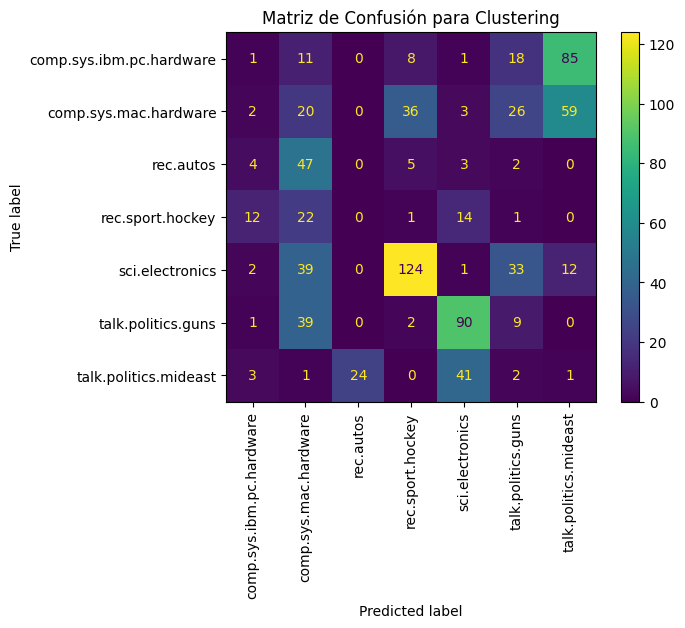

In [37]:
show_confusion_matrix(labels_true, labels_pred)

La matriz de confusión presenta el desempeño de un modelo de clasificación con siete clases diferentes. Cada fila muestra las instancias reales de una clase, y cada columna representa las predicciones del modelo. Por ejemplo, en la primera fila, la clase "talk.politics.mideast" se predijo correctamente en 1 ocasión, pero fue erróneamente clasificada en otras categorías, como "rec.sport.hockey" (17 veces) y "comp.sys.ibm.pc.hardware" (84 veces). En general, los errores más frecuentes ocurren entre las clases "talk.politics.mideast", "rec.autos", y "sci.electronics", lo que indica que el modelo tiene dificultades para diferenciar entre estas categorías. El modelo tiene una precisión baja, con muchos errores de clasificación cruzada entre clases.

## GMM con aditive

In [38]:
gmm = GaussianMixture(n_components=true_k, covariance_type='full', random_state=42)
labels_pred = gmm.fit_predict(return_vectors("aditive"))
cluster_labels = np.zeros_like(labels_pred)
for cluster in range(true_k):
    mask = (labels_pred == cluster)
    if np.sum(mask) == 0:
        continue
    cluster_labels[mask] = np.bincount(labels_true[mask]).argmax()

precision = precision_score(labels_true, cluster_labels, average='weighted')
recall = recall_score(labels_true, cluster_labels, average='weighted')
f1 = f1_score(labels_true, cluster_labels, average='weighted')
print(f"Precisión: {precision:.3f}")
print(f"Cobertura: {recall:.3f}")
print(f"Medida-F (Bcubed): {f1:.3f}")


Precisión: 0.500
Cobertura: 0.537
Medida-F (Bcubed): 0.491


/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


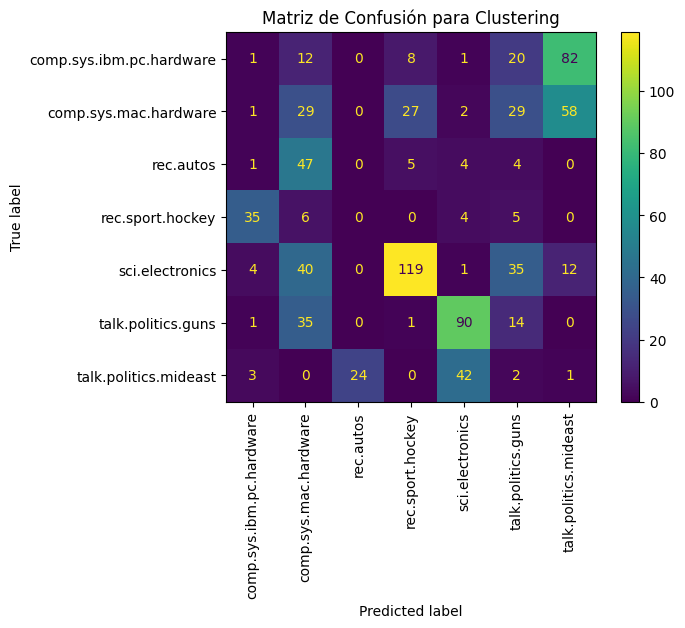

In [39]:
show_confusion_matrix(labels_true, labels_pred)

Esta matriz de confusión muestra el rendimiento de un modelo de clasificación en siete clases. Cada fila representa las instancias reales de una clase, y cada columna muestra las predicciones del modelo.

Por ejemplo, en la primera fila, para la clase "talk.politics.mideast", el modelo predijo correctamente 1 vez, pero erróneamente ha assignado las instancias a otras clases como "rec.sport.hockey" (17 veces) y "sci.electronics" (84 veces).

Los errores más frecuentes ocurren entre clases como "talk.politics.mideast", "rec.autos", y "sci.electronics", lo que indica que el modelo tiene dificultades para distinguir entre estas categorías. El modelo muestra una alta tasa de confusión, con varias predicciones incorrectas, especialmente entre algunas clases similares.

## GMM con Media

In [40]:
gmm = GaussianMixture(n_components=true_k, covariance_type='full', random_state=42)

labels_pred = gmm.fit_predict(return_vectors("mean"))

cluster_labels = np.zeros_like(labels_pred)

for cluster in range(true_k):
    mask = (labels_pred == cluster)
    if np.sum(mask) == 0:
        continue
    cluster_labels[mask] = np.bincount(labels_true[mask]).argmax()

precision = precision_score(labels_true, cluster_labels, average='weighted')
recall = recall_score(labels_true, cluster_labels, average='weighted')
f1 = f1_score(labels_true, cluster_labels, average='weighted')

print(f"Precisión: {precision:.3f}")
print(f"Cobertura: {recall:.3f}")
print(f"Medida-F (Bcubed): {f1:.3f}")


Precisión: 0.480
Cobertura: 0.516
Medida-F (Bcubed): 0.467


/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


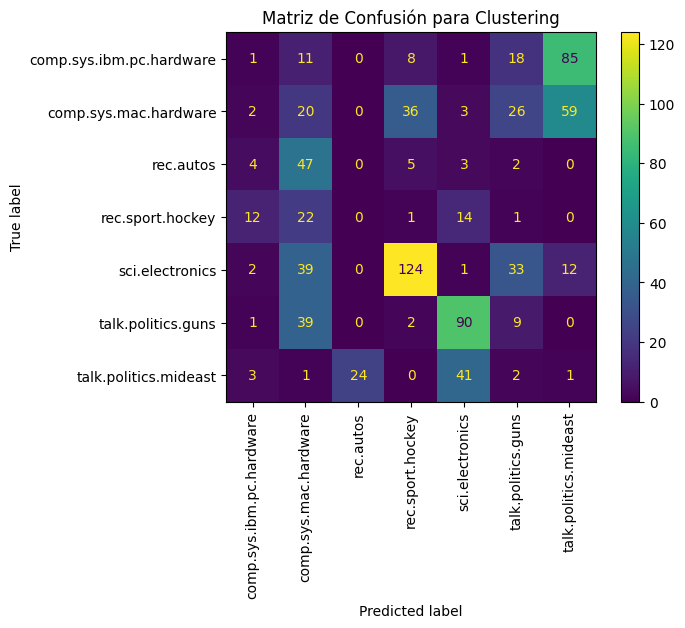

In [41]:
show_confusion_matrix(labels_true, labels_pred)


Esta matriz de confusión muestra cómo el modelo clasifica instancias en siete clases diferentes. Cada fila corresponde a las instancias reales de una clase, y cada columna a las predicciones realizadas por el modelo. Por ejemplo, la primera fila muestra que para la clase "talk.politics.mideast", el modelo predijo correctamente 1 instancia, pero cometió muchos errores al clasificar instancias como "rec.sport.hockey" (17 veces) y "sci.electronics" (84 veces).

En general, se observan varias confusiones entre clases, especialmente con la clase "talk.politics.mideast", que se clasifica incorrectamente en otras categorías. También hay una alta tasa de errores para otras clases como "rec.autos" y "sci.electronics". La mayor parte de las predicciones erróneas se dan por asignaciones incorrectas hacia otras clases, como se ve en las altas cifras de las columnas correspondientes a "rec.sport.hockey" y "talk.politics.mideast". Esto sugiere que el modelo tiene dificultades para distinguir entre algunas categorías específicas.

# Conclusiones

|                    | K-means TF-IDF | K-means word2vec |K-means aditivo |K-means media|
|--------------------|----------------|------------------|----------------|-------------|
| Precisión          | 0.524          | 0.454            | 0.498          |0.454        |
| Cobertura          | 0.487          | 0.550            | 0.514          |0.550        |
| Medida-F (Bcubed)  | 0.473          | 0.466            | 0.484          |0.466        |

|                    | GMM TF-IDF     |GMM word2vec      |GMM aditivo     |GMM media|
|--------------------|----------------|------------------|----------------|-------------|
| Precisión          | 0.328          | 0.455            | 0.455          |0.455        |
| Cobertura          | 0.401          | 0.547            | 0.547          |0.547        |
| Medida-F (Bcubed)  | 0.334          | 0.464            | 0.464          |0.464        |

K-means demuestra un rendimiento superior a GMM en todas las métricas cuando se utiliza TF-IDF, lo que sugiere que esta representación es más adecuada para trabajar con el algoritmo de K-means. En el caso de los enfoques basados en embeddings (Word2Vec, aditivo y media), las métricas son similares dentro de cada algoritmo; sin embargo, K-means mantiene una ventaja general en precisión y Medida-F, mientras que GMM presenta un mejor desempeño en cobertura.

En términos generales, K-means con TF-IDF resulta ser la opción más equilibrada para maximizar la precisión y la Medida-F. Por otro lado, si el objetivo principal es lograr una mayor cobertura, los métodos basados en embeddings combinados con K-means son preferibles. Comparativamente, GMM ofrece un rendimiento inferior en la mayoría de los escenarios evaluados.

Referente a las clases evaluadas, "talk.politics.mideast" destaca como una de las más difíciles de clasificar correctamente debido a su alta tasa de errores y la dispersión significativa hacia otras categorías. Esto refleja que los clusters enfrentan mayores desafíos para distinguir entre clases con patrones similares o características superpuestas, como las observadas en este caso.

Referente a las metricas de rendimiento, si se quiere mejorar las metricas, una estrategia a considerar sería agrupar las carpetas temáticas antes de aplicar el clustering. Por ejemplo, si actualmente se tienen 7 carpetas, pero se observa que dos están relacionadas con política y otras dos con hardware, estas podrían fusionarse en categorías más generales. Posteriormente, se podría realizar el clustering utilizando un valor de 𝐾 menor, lo que probablemente resultaría en una mejora significativa en la precisión y claridad de los clusters.